# newton ip

In [45]:
import numpy as np
import sympy as sy
sy.init_printing()
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
xs=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
size=len(xs)

In [47]:
x=sy.symbols('x')
prod_polys=[sy.prod([x-xs[i] for i in range(k)] ) for k in range(size)]
prod_polys

In [54]:
a=np.empty((size,size))
for i,y in enumerate(ys):
    a[i][0]=y
a

array([[  2.        ,   3.5101219 ,   4.26801633,   4.49987487,
          4.38363044,   4.05651471,   3.62175494,   3.15447872,
          2.70689101,   2.31278516],
       [  2.1       ,   1.75099979,   1.59126426,   1.50614551,
          1.48563025,   1.51741523,   1.5882149 ,   1.68478515,
          1.79469838,   1.90690283],
       [  1.6       ,   2.10294297,   2.17415758,   2.22248287,
          2.24657953,   2.24684946,   2.22520944,   2.18483082,
          2.12985927,   2.06512661],
       [  2.6       ,   1.92743443,   1.86506545,   1.8136324 ,
          1.77745285,   1.76012246,   1.76438566,   1.79204398,
          1.84390237,   1.91975297],
       [  1.5       ,   2.13768899,   2.27464158,   2.4255193 ,
          2.58598565,   2.75125835,   2.91628175,   3.07590947,
          3.22509233,   3.35906622],
       [  2.7       ,   3.56484131,   3.63012625,   3.66746287,
          3.67596916,   3.65589031,   3.60864831,   3.53685564,
          3.44429022,   3.33582991],
       [  

In [59]:
row,col=size,size
for j in range(1,col):
    for i in range(row-j):
        a[i][j]=(a[i+1][j-1]-a[i][j-1])/(xs[i+j]-xs[i])
print(a)


[[  2.00000000e+00   5.00000000e-01  -7.50000000e+00   4.37500000e+01
   -1.48437500e+02   2.28298611e+02  -2.94704861e+02   3.57259115e+02
   -4.41240045e+02   5.47970834e+02]
 [  2.10000000e+00  -2.50000000e+00   1.87500000e+01  -7.50000000e+01
    1.25520833e+02  -1.84288194e+02   2.76909722e+02  -4.36972966e+02
    6.54701623e+02   1.90690283e+00]
 [  1.60000000e+00   5.00000000e+00  -2.62500000e+01   5.05208333e+01
   -9.56250000e+01   2.03385417e+02  -4.22247024e+02   7.41489955e+02
    2.12985927e+00   2.06512661e+00]
 [  2.60000000e+00  -5.50000000e+00   1.41666667e+01  -4.51041667e+01
    1.48437500e+02  -3.87760417e+02   7.64136905e+02   1.79204398e+00
    1.84390237e+00   1.91975297e+00]
 [  1.50000000e+00   3.00000000e+00  -2.19166667e+01   1.03333333e+02
   -3.16875000e+02   6.82031250e+02   2.91628175e+00   3.07590947e+00
    3.22509233e+00   3.35906622e+00]
 [  2.70000000e+00  -1.01500000e+01   6.07500000e+01  -2.13541667e+02
    5.01562500e+02   3.65589031e+00   3.60864

In [60]:
diff_array=a[0]
diff_array

array([  2.00000000e+00,   5.00000000e-01,  -7.50000000e+00,
         4.37500000e+01,  -1.48437500e+02,   2.28298611e+02,
        -2.94704861e+02,   3.57259115e+02,  -4.41240045e+02,
         5.47970834e+02])

In [61]:
prod_polys
newton_abst=np.dot(diff_array,prod_polys)
newton_abst

In [62]:
newton_x=sy.Lambda(x,newton_abst.subs({x:x}))

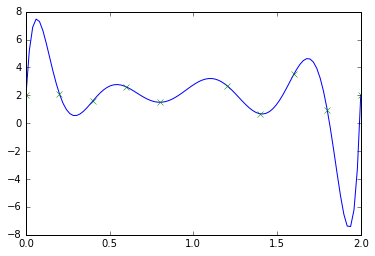

In [63]:
fig,ax=plt.subplots()
pltx=np.linspace(0,2.0,100)
plty=np.vectorize(newton_x)(pltx)
ax.plot(pltx,plty)
ax.plot(xs,ys,'gx')

# final code 

In [1]:
import numpy as np
import sympy as sy
sy.init_printing()
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
xs=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
size=len(xs)
x=sy.symbols('x')
prod_polys=[sy.prod([x-xs[i] for i in range(k)] ) for k in range(size)]
a=np.empty((size,size))
for i,y in enumerate(ys):
    a[i][0]=y
row,col=size,size
# do newton ip core algorithm
for j in range(1,col):
    for i in range(row-j):
        a[i][j]=(a[i+1][j-1]-a[i][j-1])/(xs[i+j]-xs[i])
diff_array=a[0]
prod_polys
newton_abst=np.dot(diff_array,prod_polys)
newton_abst.simplify()

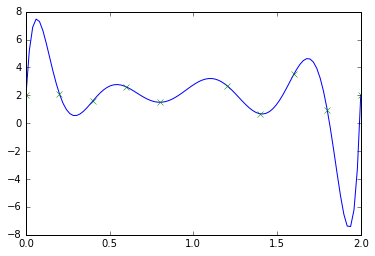

In [4]:
newton_x=sy.Lambda(x,newton_abst.subs({x:x}))
fig,ax=plt.subplots()
pltx=np.linspace(0,2.0,100)
plty=np.vectorize(newton_x)(pltx)
ax.plot(pltx,plty)
ax.plot(xs,ys,'gx')